In [ ]:
import tensorflow as tf
import torch.nn as nn
import scipy
import numpy as np

# Read in Data

In [ ]:
!wget https://raw.githubusercontent.com/AI-Group-4-Classification-of-alcohols/TermProject/main/QCM10.csv

--2023-04-21 06:14:29--  https://raw.githubusercontent.com/AI-Group-4-Classification-of-alcohols/TermProject/main/QCM10.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2293 (2.2K) [text/plain]
Saving to: ‘QCM10.csv’

QCM10.csv           100%[===================>]   2.24K  --.-KB/s    in 0s      

2023-04-21 06:14:29 (27.4 MB/s) - ‘QCM10.csv’ saved [2293/2293]



In [ ]:
import pandas as pd 
QCM10 = pd.read_csv("QCM10.csv", sep=";", dtype=np.float32)

In [ ]:
QCM10.head()

0.799_0.201  0.799_0.201.1  0.700_0.300  0.700_0.300.1  0.600_0.400  \
0       -11.98         -10.99   -19.120001     -17.280001   -33.130001   
1       -12.15         -11.33   -22.330000     -19.950001   -39.820000   
2       -12.58         -11.74   -26.670000     -23.340000   -46.480000   
3       -13.79         -12.82   -30.559999     -26.180000   -52.299999   
4       -15.73         -13.87   -34.540001     -28.650000   -57.439999   

   0.600_0.400.1  0.501_0.499  0.501_0.499.1  0.400_0.600  0.400_0.600.1  \
0     -28.450001   -48.830002     -40.770000   -62.490002     -50.820000   
1     -33.639999   -56.900002     -46.770000   -73.320000     -58.959999   
2     -38.689999   -65.949997     -53.459999   -84.529999     -67.209999   
3     -42.980000   -73.809998     -59.189999   -94.410004     -74.400002   
4     -46.259998   -80.370003     -63.490002  -102.940002     -80.250000   

   1-Octanol  1-Propanol  2-Butanol  2-propanol  1-isobutanol  
0        1.0         0.0        0.0         0.0           0.0  
1        1.0         0.0        0.0         0.0           0.0  
2        1.0         0.0        0.0         0.0           0.0  
3        1.0         0.0        0.0         0.0           0.0  
4        1.0         0.0        0.0         0.0           0.0

# Build ANN Model

In [ ]:
X = QCM10.iloc[:,0:10].values
y = QCM10.iloc[:, [10,11,12,13,14]].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0) 

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#SGD Model

In [ ]:
model_sgd1 = tf.keras.Sequential()
model_sgd1.add(tf.keras.layers.Dense(units=40, activation="sigmoid",input_shape=(10,)))
model_sgd1.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_sgd1.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
history1 = model_sgd1.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
Epoch 7501/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0970 - accuracy: 0.7333 - val_loss: 0.1354 - val_accuracy: 0.4000
Epoch 7502/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0970 - accuracy: 0.7333 - val_loss: 0.1354 - val_accuracy: 0.4000
Epoch 7503/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0970 - accuracy: 0.7333 - val_loss: 0.1354 - val_accuracy: 0.4000
Epoch 7504/10000
1/1 [==============================] - 0s 66ms/step - loss: 0.0970 - accuracy: 0.7333 - val_loss: 0.1354 - val_accuracy: 0.4000
Epoch 7505/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0970 - accuracy: 0.7333 - val_loss: 0.1354 - val_accuracy: 0.4000
Epoch 7506/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.0970 - accuracy: 0.7333 - val_loss: 0.1354 - val_accuracy: 0.4000
Epoch 7507/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.

In [ ]:
model_sgd2 = tf.keras.Sequential()
model_sgd2.add(tf.keras.layers.Dense(units=50, activation="sigmoid",input_shape=(10,)))
model_sgd2.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_sgd2.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
history_sgd2 = model_sgd2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
Epoch 7501/10000
1/1 [==============================] - 0s 83ms/step - loss: 0.0969 - accuracy: 0.7333 - val_loss: 0.1292 - val_accuracy: 0.4000
Epoch 7502/10000
1/1 [==============================] - 0s 77ms/step - loss: 0.0969 - accuracy: 0.7333 - val_loss: 0.1292 - val_accuracy: 0.4000
Epoch 7503/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.0969 - accuracy: 0.7333 - val_loss: 0.1292 - val_accuracy: 0.4000
Epoch 7504/10000
1/1 [==============================] - 0s 83ms/step - loss: 0.0969 - accuracy: 0.7333 - val_loss: 0.1292 - val_accuracy: 0.4000
Epoch 7505/10000
1/1 [==============================] - 0s 80ms/step - loss: 0.0969 - accuracy: 0.7333 - val_loss: 0.1292 - val_accuracy: 0.4000
Epoch 7506/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0969 - accuracy: 0.7333 - val_loss: 0.1292 - val_accuracy: 0.4000
Epoch 7507/10000
1/1 [==============================] - 0s 76ms/step - loss: 0.

In [ ]:
model_sgd3 = tf.keras.Sequential()
model_sgd3.add(tf.keras.layers.Dense(units=60, activation="sigmoid",input_shape=(10,)))
model_sgd3.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_sgd3.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
history_sgd3 = model_sgd3.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 64ms/step - loss: 0.0970 - accuracy: 0.7333 - val_loss: 0.1351 - val_accuracy: 0.4000
Epoch 7502/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.0970 - accuracy: 0.7333 - val_loss: 0.1351 - val_accuracy: 0.4000
Epoch 7503/10000
1/1 [==============================] - 0s 90ms/step - loss: 0.0970 - accuracy: 0.7333 - val_loss: 0.1351 - val_accuracy: 0.4000
Epoch 7504/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0970 - accuracy: 0.7333 - val_loss: 0.1351 - val_accuracy: 0.4000
Epoch 7505/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0970 - accuracy: 0.7333 - val_loss: 0.1351 - val_accuracy: 0.4000
Epoch 7506/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0970 - accuracy: 0.7333 - val_loss: 0.1351 - val_accuracy: 0.4000
Epoch 7507/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.0970 - accuracy: 

In [ ]:
model_sgd4 = tf.keras.Sequential()
model_sgd4.add(tf.keras.layers.Dense(units=70, activation="sigmoid",input_shape=(10,)))
model_sgd4.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_sgd4.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
history_sgd4 = model_sgd4.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 64ms/step - loss: 0.0959 - accuracy: 0.7333 - val_loss: 0.1317 - val_accuracy: 0.4000
Epoch 7502/10000
1/1 [==============================] - 0s 76ms/step - loss: 0.0959 - accuracy: 0.7333 - val_loss: 0.1317 - val_accuracy: 0.4000
Epoch 7503/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.0959 - accuracy: 0.7333 - val_loss: 0.1317 - val_accuracy: 0.4000
Epoch 7504/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0959 - accuracy: 0.7333 - val_loss: 0.1316 - val_accuracy: 0.4000
Epoch 7505/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.0959 - accuracy: 0.7333 - val_loss: 0.1316 - val_accuracy: 0.4000
Epoch 7506/10000
1/1 [==============================] - 0s 77ms/step - loss: 0.0959 - accuracy: 0.7333 - val_loss: 0.1316 - val_accuracy: 0.4000
Epoch 7507/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.0959 - accuracy: 

In [ ]:
model_sgd5 = tf.keras.Sequential()
model_sgd5.add(tf.keras.layers.Dense(units=80, activation="sigmoid",input_shape=(10,)))
model_sgd5.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_sgd5.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
history_sgd5 = model_sgd5.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 64ms/step - loss: 0.0954 - accuracy: 0.7333 - val_loss: 0.1358 - val_accuracy: 0.4000
Epoch 7502/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.0954 - accuracy: 0.7333 - val_loss: 0.1358 - val_accuracy: 0.4000
Epoch 7503/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.0954 - accuracy: 0.7333 - val_loss: 0.1358 - val_accuracy: 0.4000
Epoch 7504/10000
1/1 [==============================] - 0s 77ms/step - loss: 0.0954 - accuracy: 0.7333 - val_loss: 0.1358 - val_accuracy: 0.4000
Epoch 7505/10000
1/1 [==============================] - 0s 85ms/step - loss: 0.0954 - accuracy: 0.7333 - val_loss: 0.1358 - val_accuracy: 0.4000
Epoch 7506/10000
1/1 [==============================] - 0s 78ms/step - loss: 0.0954 - accuracy: 0.7333 - val_loss: 0.1358 - val_accuracy: 0.4000
Epoch 7507/10000
1/1 [==============================] - 0s 95ms/step - loss: 0.0954 - accuracy: 

In [ ]:
model_sgd6 = tf.keras.Sequential()
model_sgd6.add(tf.keras.layers.Dense(units=90, activation="sigmoid",input_shape=(10,)))
model_sgd6.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_sgd6.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
history_sgd6 = model_sgd6.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 69ms/step - loss: 0.0950 - accuracy: 0.7333 - val_loss: 0.1340 - val_accuracy: 0.4000
Epoch 7502/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0950 - accuracy: 0.7333 - val_loss: 0.1340 - val_accuracy: 0.4000
Epoch 7503/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0950 - accuracy: 0.7333 - val_loss: 0.1340 - val_accuracy: 0.4000
Epoch 7504/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0950 - accuracy: 0.7333 - val_loss: 0.1340 - val_accuracy: 0.4000
Epoch 7505/10000
1/1 [==============================] - 0s 80ms/step - loss: 0.0949 - accuracy: 0.7333 - val_loss: 0.1340 - val_accuracy: 0.4000
Epoch 7506/10000
1/1 [==============================] - 0s 66ms/step - loss: 0.0949 - accuracy: 0.7333 - val_loss: 0.1340 - val_accuracy: 0.4000
Epoch 7507/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0949 - accuracy: 

# Adam Model

In [ ]:
model_adam1 = tf.keras.Sequential()
model_adam1.add(tf.keras.layers.Dense(units=40, activation="sigmoid",input_shape=(10,)))
model_adam1.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_adam1.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history_adam1 = model_adam1.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 68ms/step - loss: 2.4217e-05 - accuracy: 1.0000 - val_loss: 6.0371e-05 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 60ms/step - loss: 2.4204e-05 - accuracy: 1.0000 - val_loss: 6.0344e-05 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 71ms/step - loss: 2.4190e-05 - accuracy: 1.0000 - val_loss: 6.0317e-05 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 82ms/step - loss: 2.4177e-05 - accuracy: 1.0000 - val_loss: 6.0290e-05 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 98ms/step - loss: 2.4164e-05 - accuracy: 1.0000 - val_loss: 6.0262e-05 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 82ms/step - loss: 2.4150e-05 - accuracy: 1.0000 - val_loss: 6.0235e-05 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

In [ ]:
model_adam2 = tf.keras.Sequential()
model_adam2.add(tf.keras.layers.Dense(units=50, activation="sigmoid",input_shape=(10,)))
model_adam2.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_adam2.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history_adam2 = model_adam2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 78ms/step - loss: 2.4796e-05 - accuracy: 1.0000 - val_loss: 6.5023e-05 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 55ms/step - loss: 2.4782e-05 - accuracy: 1.0000 - val_loss: 6.4995e-05 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 77ms/step - loss: 2.4768e-05 - accuracy: 1.0000 - val_loss: 6.4967e-05 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 68ms/step - loss: 2.4754e-05 - accuracy: 1.0000 - val_loss: 6.4939e-05 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 60ms/step - loss: 2.4740e-05 - accuracy: 1.0000 - val_loss: 6.4911e-05 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 71ms/step - loss: 2.4726e-05 - accuracy: 1.0000 - val_loss: 6.4883e-05 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

In [ ]:
model_adam3 = tf.keras.Sequential()
model_adam3.add(tf.keras.layers.Dense(units=60, activation="sigmoid",input_shape=(10,)))
model_adam3.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_adam3.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history_adam3 = model_adam3.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 67ms/step - loss: 1.7718e-05 - accuracy: 1.0000 - val_loss: 4.7950e-05 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 65ms/step - loss: 1.7708e-05 - accuracy: 1.0000 - val_loss: 4.7928e-05 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 52ms/step - loss: 1.7699e-05 - accuracy: 1.0000 - val_loss: 4.7907e-05 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 68ms/step - loss: 1.7689e-05 - accuracy: 1.0000 - val_loss: 4.7885e-05 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 50ms/step - loss: 1.7679e-05 - accuracy: 1.0000 - val_loss: 4.7864e-05 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 51ms/step - loss: 1.7669e-05 - accuracy: 1.0000 - val_loss: 4.7842e-05 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

In [ ]:
model_adam4 = tf.keras.Sequential()
model_adam4.add(tf.keras.layers.Dense(units=70, activation="sigmoid",input_shape=(10,)))
model_adam4.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_adam4.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history_adam4 = model_adam4.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 68ms/step - loss: 1.6587e-05 - accuracy: 1.0000 - val_loss: 5.2797e-05 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 69ms/step - loss: 1.6577e-05 - accuracy: 1.0000 - val_loss: 5.2774e-05 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 53ms/step - loss: 1.6568e-05 - accuracy: 1.0000 - val_loss: 5.2751e-05 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 50ms/step - loss: 1.6559e-05 - accuracy: 1.0000 - val_loss: 5.2728e-05 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 69ms/step - loss: 1.6550e-05 - accuracy: 1.0000 - val_loss: 5.2705e-05 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 54ms/step - loss: 1.6540e-05 - accuracy: 1.0000 - val_loss: 5.2682e-05 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

In [ ]:
model_adam5 = tf.keras.Sequential()
model_adam5.add(tf.keras.layers.Dense(units=80, activation="sigmoid",input_shape=(10,)))
model_adam5.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_adam5.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history_adam5 = model_adam5.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 91ms/step - loss: 1.5711e-05 - accuracy: 1.0000 - val_loss: 7.2514e-05 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 74ms/step - loss: 1.5702e-05 - accuracy: 1.0000 - val_loss: 7.2489e-05 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 70ms/step - loss: 1.5693e-05 - accuracy: 1.0000 - val_loss: 7.2463e-05 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 73ms/step - loss: 1.5684e-05 - accuracy: 1.0000 - val_loss: 7.2438e-05 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 74ms/step - loss: 1.5676e-05 - accuracy: 1.0000 - val_loss: 7.2413e-05 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 74ms/step - loss: 1.5667e-05 - accuracy: 1.0000 - val_loss: 7.2387e-05 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

In [ ]:
model_adam6 = tf.keras.Sequential()
model_adam6.add(tf.keras.layers.Dense(units=90, activation="sigmoid",input_shape=(10,)))
model_adam6.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_adam6.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history_adam6 = model_adam6.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 72ms/step - loss: 8.0235e-06 - accuracy: 1.0000 - val_loss: 3.2559e-05 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 64ms/step - loss: 8.0190e-06 - accuracy: 1.0000 - val_loss: 3.2545e-05 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 73ms/step - loss: 8.0145e-06 - accuracy: 1.0000 - val_loss: 3.2532e-05 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 49ms/step - loss: 8.0100e-06 - accuracy: 1.0000 - val_loss: 3.2518e-05 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 51ms/step - loss: 8.0056e-06 - accuracy: 1.0000 - val_loss: 3.2504e-05 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 48ms/step - loss: 8.0011e-06 - accuracy: 1.0000 - val_loss: 3.2491e-05 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

# RMSProp Model


In [ ]:
model_rms1 = tf.keras.Sequential()
model_rms1.add(tf.keras.layers.Dense(units=40, activation="sigmoid",input_shape=(10,)))
model_rms1.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_rms1.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history_rms1 = model_rms1.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 75ms/step - loss: 7.1443e-05 - accuracy: 1.0000 - val_loss: 1.6481e-04 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 95ms/step - loss: 7.1432e-05 - accuracy: 1.0000 - val_loss: 1.6479e-04 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 87ms/step - loss: 7.1420e-05 - accuracy: 1.0000 - val_loss: 1.6477e-04 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 103ms/step - loss: 7.1409e-05 - accuracy: 1.0000 - val_loss: 1.6475e-04 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 68ms/step - loss: 7.1397e-05 - accuracy: 1.0000 - val_loss: 1.6473e-04 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 68ms/step - loss: 7.1386e-05 - accuracy: 1.0000 - val_loss: 1.6471e-04 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [=========================

In [ ]:
model_rms2 = tf.keras.Sequential()
model_rms2.add(tf.keras.layers.Dense(units=50, activation="sigmoid",input_shape=(10,)))
model_rms2.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_rms2.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history_rms2 = model_rms2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 71ms/step - loss: 6.5518e-05 - accuracy: 1.0000 - val_loss: 1.4627e-04 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 82ms/step - loss: 6.5508e-05 - accuracy: 1.0000 - val_loss: 1.4625e-04 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 53ms/step - loss: 6.5497e-05 - accuracy: 1.0000 - val_loss: 1.4623e-04 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 67ms/step - loss: 6.5487e-05 - accuracy: 1.0000 - val_loss: 1.4622e-04 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 50ms/step - loss: 6.5476e-05 - accuracy: 1.0000 - val_loss: 1.4620e-04 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 72ms/step - loss: 6.5466e-05 - accuracy: 1.0000 - val_loss: 1.4618e-04 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

In [ ]:
model_rms3 = tf.keras.Sequential()
model_rms3.add(tf.keras.layers.Dense(units=60, activation="sigmoid",input_shape=(10,)))
model_rms3.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_rms3.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history_rms3 = model_rms3.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 69ms/step - loss: 6.2685e-05 - accuracy: 1.0000 - val_loss: 1.6096e-04 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 68ms/step - loss: 6.2675e-05 - accuracy: 1.0000 - val_loss: 1.6094e-04 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 52ms/step - loss: 6.2665e-05 - accuracy: 1.0000 - val_loss: 1.6092e-04 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 72ms/step - loss: 6.2655e-05 - accuracy: 1.0000 - val_loss: 1.6091e-04 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 68ms/step - loss: 6.2645e-05 - accuracy: 1.0000 - val_loss: 1.6089e-04 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 66ms/step - loss: 6.2635e-05 - accuracy: 1.0000 - val_loss: 1.6087e-04 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

In [ ]:
model_rms4 = tf.keras.Sequential()
model_rms4.add(tf.keras.layers.Dense(units=70, activation="sigmoid",input_shape=(10,)))
model_rms4.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_rms4.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history_rms4 = model_rms4.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
Epoch 7501/10000
1/1 [==============================] - 0s 76ms/step - loss: 5.7844e-05 - accuracy: 1.0000 - val_loss: 1.3813e-04 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 66ms/step - loss: 5.7835e-05 - accuracy: 1.0000 - val_loss: 1.3812e-04 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 49ms/step - loss: 5.7826e-05 - accuracy: 1.0000 - val_loss: 1.3810e-04 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 52ms/step - loss: 5.7816e-05 - accuracy: 1.0000 - val_loss: 1.3808e-04 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 65ms/step - loss: 5.7807e-05 - accuracy: 1.0000 - val_loss: 1.3806e-04 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 47ms/step - loss: 5.7798e-05 - accuracy: 1.0000 - val_loss: 1.3805e-04 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [=========

In [ ]:
model_rms5 = tf.keras.Sequential()
model_rms5.add(tf.keras.layers.Dense(units=80, activation="sigmoid",input_shape=(10,)))
model_rms5.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_rms5.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history_rms5 = model_rms5.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 89ms/step - loss: 5.4977e-05 - accuracy: 1.0000 - val_loss: 1.6316e-04 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 87ms/step - loss: 5.4968e-05 - accuracy: 1.0000 - val_loss: 1.6314e-04 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 54ms/step - loss: 5.4959e-05 - accuracy: 1.0000 - val_loss: 1.6313e-04 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 56ms/step - loss: 5.4950e-05 - accuracy: 1.0000 - val_loss: 1.6311e-04 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 65ms/step - loss: 5.4941e-05 - accuracy: 1.0000 - val_loss: 1.6309e-04 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 111ms/step - loss: 5.4932e-05 - accuracy: 1.0000 - val_loss: 1.6307e-04 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [=========================

In [ ]:
model_rms6 = tf.keras.Sequential()
model_rms6.add(tf.keras.layers.Dense(units=90, activation="sigmoid",input_shape=(10,)))
model_rms6.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_rms6.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history_rms6 = model_rms6.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 55ms/step - loss: 5.5081e-05 - accuracy: 1.0000 - val_loss: 1.6202e-04 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 99ms/step - loss: 5.5073e-05 - accuracy: 1.0000 - val_loss: 1.6200e-04 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 87ms/step - loss: 5.5064e-05 - accuracy: 1.0000 - val_loss: 1.6198e-04 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 70ms/step - loss: 5.5055e-05 - accuracy: 1.0000 - val_loss: 1.6197e-04 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 85ms/step - loss: 5.5046e-05 - accuracy: 1.0000 - val_loss: 1.6195e-04 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 77ms/step - loss: 5.5037e-05 - accuracy: 1.0000 - val_loss: 1.6193e-04 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

# Examine Output

In [ ]:
test_loss, test_acc = model_sgd4.evaluate(X_test, y_test)
test_loss, test_acc = model_adam6.evaluate(X_test, y_test)
test_loss, test_acc = model_rms6.evaluate(X_test, y_test)

1/1 [==============================] - 0s 34ms/step - loss: 1.2885e-04 - accuracy: 1.0000


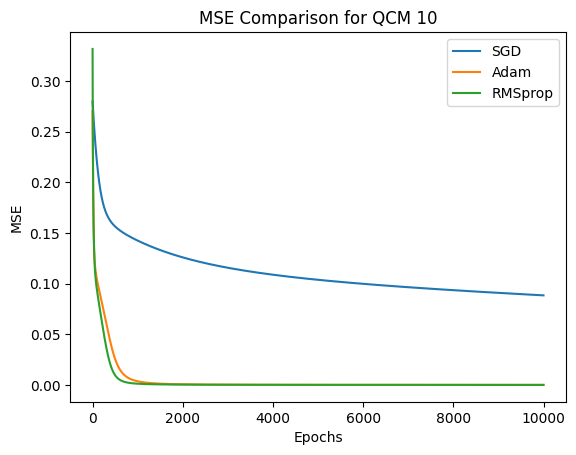

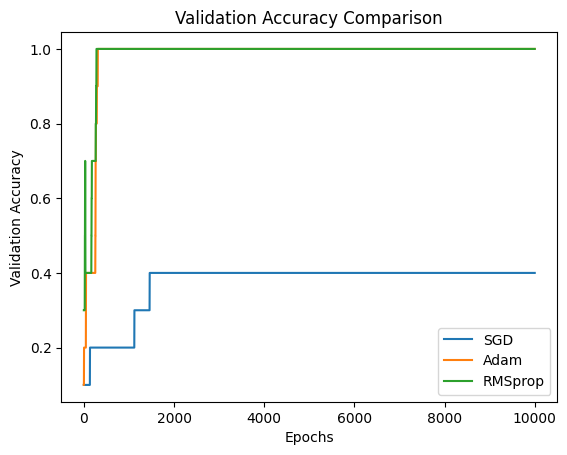

In [ ]:
import matplotlib.pyplot as plt

# Plot validation loss
plt.plot(history_sgd4.history['loss'])
plt.plot(history_adam6.history['loss'])
plt.plot(history_rms6.history['loss'])
plt.title('MSE Comparison for QCM 10')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(['SGD', 'Adam', 'RMSprop'])
plt.show()

# Plot validation accuracy
plt.plot(history_sgd5.history['val_accuracy'])
plt.plot(history_adam4.history['val_accuracy'])
plt.plot(history_rms6.history['val_accuracy'])
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend(['SGD', 'Adam', 'RMSprop'])
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plot validation loss
plt.plot(history1.history['val_loss'])
plt.plot(history_sgd2.history['val_loss'])
plt.plot(history_sgd3.history['val_loss'])
plt.plot(history_sgd4.history['val_loss'])
plt.plot(history_sgd5.history['val_loss'])
plt.plot(history_sgd6.history['val_loss'])
plt.title('Validation Loss Comparison for SGD')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend(['40 neurons', '50 neurons', '60 neurons','70 neurons','80 neurons','90 neurons'])
plt.show()

# Plot validation accuracy
plt.plot(history1.history['val_accuracy'])
plt.plot(history_sgd2.history['val_accuracy'])
plt.plot(history_sgd3.history['val_accuracy'])
plt.plot(history_sgd4.history['val_accuracy'])
plt.plot(history_sgd5.history['val_accuracy'])
plt.plot(history_sgd6.history['val_accuracy'])
plt.title('Validation Accuracy Comparison for SGD')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend(['40 neurons', '50 neurons', '60 neurons','70 neurons','80 neurons','90 neurons'])
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Plot validation loss
plt.plot(history_adam1.history['val_loss'])
plt.plot(history_adam2.history['val_loss'])
plt.plot(history_adam3.history['val_loss'])
plt.plot(history_adam4.history['val_loss'])
plt.plot(history_adam5.history['val_loss'])
plt.plot(history_adam6.history['val_loss'])
plt.title('Validation Loss Comparison for Adam')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend(['40 neurons', '50 neurons', '60 neurons','70 neurons','80 neurons','90 neurons'])
plt.show()

# Plot validation accuracy
plt.plot(history_adam1.history['val_accuracy'])
plt.plot(history_adam2.history['val_accuracy'])
plt.plot(history_adam3.history['val_accuracy'])
plt.plot(history_adam4.history['val_accuracy'])
plt.plot(history_adam5.history['val_accuracy'])
plt.plot(history_adam6.history['val_accuracy'])
plt.title('Validation Accuracy Comparison for Adam')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend(['40 neurons', '50 neurons', '60 neurons','70 neurons','80 neurons','90 neurons'])
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Plot validation loss
plt.plot(history_rms1.history['val_loss'])
plt.plot(history_rms2.history['val_loss'])
plt.plot(history_rms3.history['val_loss'])
plt.plot(history_rms4.history['val_loss'])
plt.plot(history_rms5.history['val_loss'])
plt.plot(history_rms6.history['val_loss'])
plt.title('Validation Loss Comparison for RMSProp')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend(['40 neurons', '50 neurons', '60 neurons','70 neurons','80 neurons','90 neurons'])
plt.show()

# Plot validation accuracy
plt.plot(history_rms1.history['val_accuracy'])
plt.plot(history_rms2.history['val_accuracy'])
plt.plot(history_rms3.history['val_accuracy'])
plt.plot(history_rms4.history['val_accuracy'])
plt.plot(history_rms5.history['val_accuracy'])
plt.plot(history_rms6.history['val_accuracy'])
plt.title('Validation Accuracy Comparison for RMSProp')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend(['40 neurons', '50 neurons', '60 neurons','70 neurons','80 neurons','90 neurons'])
plt.show()
